Nombre:Burlecot Matias Corso Flores
CU: 35-5086
Carrera: Ingenieria en Sistemas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

**PREGUNTA 1 Y 2:**
 Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.
 Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [ ]:
# Carga el archivo CSV desde la ruta especificada y lo almacena en un DataFrame 'data'
data = pd.read_csv('/content/drive/MyDrive/DatasetsLab/lab04/covtype.csv', delimiter=',')

#P1
# Añade una nueva columna 'SoilTypeCode' con valores aleatorios entre 'A', 'B', 'C' o 'D' para cada fila
data['SoilTypeCode'] = [random.choice(['A', 'B', 'C', 'D']) for _ in range(len(data))]

# Añade una nueva columna 'ForestRegionDescription' con valores aleatorios de las descripciones geográficas
data['ForestRegionDescription'] = [
    random.choice(['Mountainous Area', 'Plains', 'Wetland', 'Dryland']) for _ in range(len(data))
]

# Añade una nueva columna 'IsProtectedArea' con valores booleanos aleatorios (True o False) indicando si es un área protegida
data['IsProtectedArea'] = [random.choice([True, False]) for _ in range(len(data))]
 #P1


# Define una lista de columnas que se desean conservar en el nuevo DataFrame
columns_to_keep = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points','SoilTypeCode','ForestRegionDescription', 'IsProtectedArea', 'Cover_Type'
]

# Filtra el DataFrame original para conservar solo las columnas seleccionadas y lo guarda en 'dataF'
dataF = data[columns_to_keep]

# Define el tamaño de la capa de entrada del modelo, igual al número de características (14)
input_layer_size  = 14

# Define el número de etiquetas o clases que el modelo debe predecir (7 en este caso)
num_labels = 7

# Selecciona las características de entrada (X) del DataFrame 'dataF', excluyendo la columna 'Cover_Type'
X = dataF[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points','SoilTypeCode','ForestRegionDescription', 'IsProtectedArea']]

# Asigna la columna 'Cover_Type' como la variable dependiente o etiquetas (y)
y = dataF['Cover_Type']

# Imprime las primeras 5 filas del DataFrame 'dataF' para una vista previa de los datos
print(dataF.head())

# Calcular los valores mínimo y máximo solo para las columnas numéricas
numeric_columns = dataF.select_dtypes(include=[np.number]).columns
min_values = dataF[numeric_columns].min()
max_values = dataF[numeric_columns].max()

#P2

# Crear nuevas filas con valores dentro de los rangos existentes
def generate_new_row(row):
    new_row = {}
    for col in row.index:
        if col in numeric_columns:
            new_row[col] = random.uniform(min_values[col], max_values[col])
        else:
            new_row[col] = row[col]  # Para columnas no numéricas, mantener los valores existentes o generar nuevos si lo prefieres
    return new_row

# Generar nuevas filas utilizando la función 'generate_new_row'
new_rows = []
for i in range(len(dataF)):
    new_row = generate_new_row(dataF.iloc[i])
    new_rows.append(new_row)

# Crear un DataFrame con las nuevas filas
new_data = pd.DataFrame(new_rows, columns=dataF.columns)

# Concatenar el DataFrame original con las nuevas filas para obtener 'dataF_augmented'
dataF_augmented = pd.concat([dataF, new_data], ignore_index=True)
#P2

# Calcular y mostrar la cantidad de filas agregadas
num_new_rows = len(dataF_augmented) - len(dataF)
print(f"\nVisualizando las {num_new_rows} filas agregadas:")
print(dataF_augmented.tail(num_new_rows))
print(f"Cantidad de filas después de duplicar: {len(dataF_augmented)}")

# Reasigna el valor de la etiqueta '3' a '0' en la variable y (posible recategorización)
y[y == 3] = 0

# Calcula el tamaño del conjunto de datos, es decir, la cantidad de ejemplos en y
m = y.size


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

<ipython-input-3-ef111462ee4b>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 3] = 0


**PREGUNTA3:**
Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


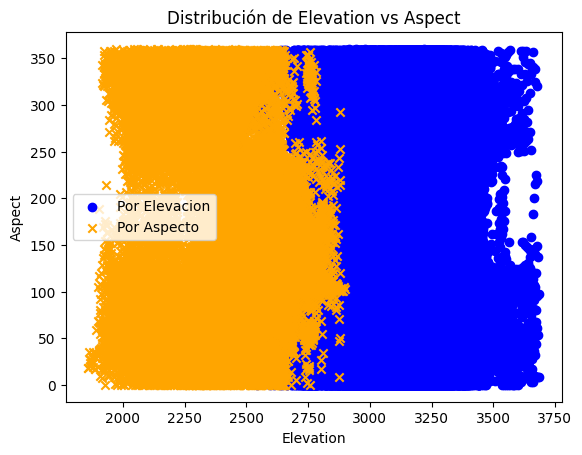

In [ ]:
#P3
# Crear una función que grafique los datos
def plotData(X, y):
    # Separar los ejemplos en dos grupos según la clase (Admitido/No admitido)
    admitido = y == 1  # Ejemplos con la etiqueta 'Admitido'
    no_admitido = y == 0  # Ejemplos con la etiqueta 'No admitido'

    # Graficar los ejemplos admitidos
    plt.scatter(X[admitido, 0], X[admitido, 1], color='blue', marker='o', label='Por Elevacion')

    # Graficar los ejemplos no admitidos
    plt.scatter(X[no_admitido, 0], X[no_admitido, 1], color='orange', marker='x', label='Por Aspecto')

    # Adicionar etiquetas para los ejes
    plt.xlabel('Elevation')
    plt.ylabel('Aspect')
    plt.legend()  # Añadir la leyenda para distinguir las categorías
    plt.title('Distribución de Elevation vs Aspect')  # Título del gráfico

# Seleccionar dos características específicas para la gráfica (por ejemplo, 'Elevation' y 'Aspect')
X_plot = X[['Elevation', 'Aspect']].values  # Asegúrate de que X sea un DataFrame y no un array NumPy
y_plot = y  # Las etiquetas

# Llamar a la función plotData para graficar
plotData(X_plot, y_plot)

# Mostrar la gráfica
plt.show()


<ipython-input-5-5acd6541f248>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF['ForestRegionDescriptionNum'] = pd.factorize(dataF['ForestRegionDescription'])[0]


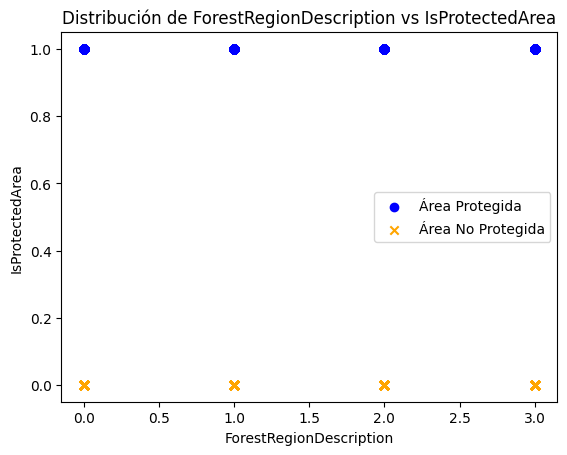

In [ ]:
# Crear una función que grafique los datos
def plotData(X, y):
    # Separar los ejemplos en dos grupos según la clase (Área protegida/No protegida)
    protected = y == True  # Ejemplos con 'IsProtectedArea' True
    not_protected = y == False  # Ejemplos con 'IsProtectedArea' False

    # Graficar los ejemplos de área protegida
    plt.scatter(X[protected, 0], X[protected, 1], color='blue', marker='o', label='Área Protegida')

    # Graficar los ejemplos de área no protegida
    plt.scatter(X[not_protected, 0], X[not_protected, 1], color='orange', marker='x', label='Área No Protegida')

    # Adicionar etiquetas para los ejes
    plt.xlabel('ForestRegionDescription')
    plt.ylabel('IsProtectedArea')
    plt.legend()  # Añadir la leyenda para distinguir las categorías
    plt.title('Distribución de ForestRegionDescription vs IsProtectedArea')  # Título del gráfico

# Convertir 'ForestRegionDescription' en variables numéricas para la gráfica
dataF['ForestRegionDescriptionNum'] = pd.factorize(dataF['ForestRegionDescription'])[0]

# Seleccionar las columnas 'ForestRegionDescriptionNum' y 'IsProtectedArea' como características
X = dataF[['ForestRegionDescriptionNum', 'IsProtectedArea']].values

# Usar la columna 'IsProtectedArea' como etiquetas
y = dataF['IsProtectedArea'].values

# Llamar a la función plotData para graficar
plotData(X, y)

# Mostrar la gráfica
plt.show()
#p3


**PREGUNTA4:**
 Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [ ]:
# Asignar las características y etiquetas de los datos duplicados
X_augmented = dataF_augmented[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                               'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                               'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                               'Horizontal_Distance_To_Fire_Points', 'SoilTypeCode',
                               'ForestRegionDescription', 'IsProtectedArea']]
# Asignar las etiquetas (target) del dataset duplicado
y_augmented = dataF_augmented['Cover_Type']

#P4

# Dividir los datos duplicados en conjuntos de entrenamiento y prueba
test_size = 0.2  # Porcentaje del dataset reservado para el conjunto de prueba
m = X_augmented.shape[0]  # Número total de ejemplos en el dataset
split_index = int(m * (1 - test_size))  # Índice para dividir el dataset en entrenamiento y prueba
indices = np.random.permutation(m)  # Generar una permutación aleatoria de los índices
train_indices = indices[:split_index]  # Índices para el conjunto de entrenamiento
test_indices = indices[split_index:]  # Índices para el conjunto de prueba

# Seleccionar los datos de entrenamiento usando los índices generados
X_train = X_augmented.iloc[train_indices]
# Seleccionar los datos de prueba usando los índices generados
X_test = X_augmented.iloc[test_indices]
# Seleccionar las etiquetas de entrenamiento usando los índices generados
y_train = y_augmented.iloc[train_indices]
# Seleccionar las etiquetas de prueba usando los índices generados
y_test = y_augmented.iloc[test_indices]
#p4

# Mostrar la cantidad de ejemplos en cada conjunto
print(f"Número de ejemplos en el conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Número de ejemplos en el conjunto de prueba: {X_test.shape[0]}")


Número de ejemplos en el conjunto de entrenamiento: 929619
Número de ejemplos en el conjunto de prueba: 232405


In [ ]:
# Lista de nombres de columnas numéricas para ser normalizadas
numerical_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                     'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                     'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                     'Horizontal_Distance_To_Fire_Points']

# Extraer los valores numéricos del DataFrame 'dataF' según las columnas especificadas
X = dataF[numerical_columns].values

# Definir la función para normalizar las características
def featureNormalize(X):
    # Crear una copia de X para no modificar el original
    X_norm = X.copy()

    # Inicializar los vectores para las medias (mu) y las desviaciones estándar (sigma)
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcular la media de cada característica
    mu = np.mean(X, axis = 0)
    # Calcular la desviación estándar de cada característica
    sigma = np.std(X, axis = 0)

    # Normalizar X usando la media y desviación estándar calculadas
    X_norm = (X - mu) / sigma

    # Devolver el dataset normalizado, la media y la desviación estándar
    return X_norm, mu, sigma


In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [ ]:
# Imprimir la fila 5 de X_norm para verificar su contenido después de la normalización
print("Fila 5 de X_norm:", X_norm[5, :])

# Imprimir las etiquetas para ver qué contiene y verificar su formato
print("Etiquetas (y):", y)


Fila 5 de X_norm: [-1.35852274 -0.21138452 -1.08219135  0.14383393 -1.05358374 -1.46425618
  0.66694213  0.69206865 -0.06605607  3.05899933]
Etiquetas (y): [ True False  True ...  True False False]


In [ ]:
# Obtener el número de ejemplos (m) y el número de características (n) de la matriz X
m, n = X.shape

# Agregar una columna de unos para el término de intercepción (sesgo) a la matriz de características normalizadas
# Aquí se está preparando X para la regresión logística añadiendo una columna de unos como el primer término
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)  # Esta línea se usará si quieres agregar el término de intercepción a X_norm
X = X_norm  # Si no quieres agregar la columna de unos, utiliza esta línea

# Agregar una columna de unos a X para el término de intercepción
# Aquí se está actualizando X para incluir el término de intercepción (sesgo)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Descomenta esta línea si has usado la primera línea para agregar la columna de unos


In [ ]:
# Función sigmoide que convierte una entrada z en un valor entre 0 y 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para calcular el costo (función de pérdida) de la regresión logística con regularización
def computeCost(theta, X, y, lambda_):
    m = len(y)  # Número de ejemplos
    h = sigmoid(X.dot(theta))  # Predicciones del modelo
    # Calcular el costo utilizando la fórmula de regresión logística
    cost = (1 / m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    # Añadir el término de regularización para evitar sobreajuste
    cost += (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost

# Función para calcular el gradiente (derivada del costo) de la regresión logística con regularización
def computeGradient(theta, X, y, lambda_):
    m = len(y)  # Número de ejemplos
    h = sigmoid(X.dot(theta))  # Predicciones del modelo
    # Calcular el gradiente utilizando la fórmula de regresión logística
    grad = (1 / m) * X.T.dot(h - y)
    # Añadir el término de regularización para evitar sobreajuste
    grad[1:] += (lambda_ / m) * theta[1:]
    return grad


In [ ]:
# Función para realizar el descenso por gradiente en la regresión logística
def gradientDescent(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)  # Número de ejemplos
    cost_history = np.zeros(num_iters)  # Historial para almacenar el costo en cada iteración
    accuracy_history = np.zeros(num_iters)  # Historial para almacenar la precisión en cada iteración

    # Iterar el número de veces especificado por num_iters
    for i in range(num_iters):
        # Calcular el gradiente usando la función computeGradient
        grad = computeGradient(theta, X, y, lambda_)
        # Actualizar los parámetros theta utilizando el gradiente y la tasa de aprendizaje alpha
        theta -= alpha * grad
        # Calcular el costo actual y almacenarlo en cost_history
        cost_history[i] = computeCost(theta, X, y, lambda_)
        # Hacer predicciones usando la función sigmoide y comparar con un umbral de 0.5
        predictions = sigmoid(X.dot(theta)) >= 0.5
        # Calcular la precisión y almacenarla en accuracy_history
        accuracy_history[i] = np.mean(predictions == y) * 100

    return theta, cost_history, accuracy_history


In [ ]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo con respecto a los parámetros.

    Parámetros
    ----------
    theta : array_like
        Parámetro theta de la regresión logística. Vector de la forma (n, ). n es el número de características
        incluida la intercepción.

    X : array_like
        Dataset con la forma (m x n). m es el número de ejemplos, y n es el número de características (incluida la intercepción).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (m, ). m es el número de ejemplos.

    lambda_ : float
        Parámetro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la función de costo regularizada.

    grad : array_like
        Un vector de la forma (n, ) que es el gradiente de la función de costo con respecto a theta, en los valores actuales de theta.
    """
    # Inicializa algunos valores útiles
    m = y.size  # Número de ejemplos

    # Convierte las etiquetas a valores enteros si son booleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0  # Inicializa el costo
    grad = np.zeros(theta.shape)  # Inicializa el gradiente

    # Calcula las predicciones del modelo utilizando la función sigmoide
    h = sigmoid(X.dot(theta.T))

    # Crea una copia de theta para no modificar el original
    temp = theta.copy()
    # Establece el primer término (intercepción) de theta en 0 para la regularización
    temp[0] = 0

    # Calcula el costo de la función de costo regularizada
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Calcula el gradiente del costo
    grad = (1 / m) * (h - y).dot(X)
    # Añade el término de regularización al gradiente
    grad = grad + (lambda_ / m) * temp

    return J, grad


**PREGUNTA6:**
 Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.


In [ ]:
#P6
def oneVsAll(X, y, num_labels, alpha, num_iters, lambda_):
    """
    Entrena un clasificador de regresión logística en un problema de clasificación multiclase usando el enfoque "One-vs-All".

    Parámetros
    ----------
    X : array_like
        Matriz de características con la forma (m x n). m es el número de ejemplos y n es el número de características (incluida la intercepción).

    y : array_like
        Vector de etiquetas con la forma (m, ). m es el número de ejemplos.

    num_labels : int
        Número de clases en el problema de clasificación.

    alpha : float
        Tasa de aprendizaje para el descenso por gradiente.

    num_iters : int
        Número de iteraciones para el descenso por gradiente.

    lambda_ : float
        Parámetro de regularización.

    Devuelve
    -------
    all_theta : array_like
        Matriz de parámetros ajustados para cada clase, con la forma (num_labels, n + 1).

    cost_histories : array_like
        Historial de costos para cada clase a lo largo de las iteraciones, con la forma (num_labels, num_iters).

    accuracy_histories : array_like
        Historial de precisión para cada clase a lo largo de las iteraciones, con la forma (num_labels, num_iters).
    """
    m, n = X.shape  # Obtiene el número de ejemplos (m) y el número de características (n)

    # Agregar el término de sesgo a X (columna de unos)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Inicializar la matriz de parámetros para todas las clases
    all_theta = np.zeros((num_labels, n + 1))

    # Inicializar los historiales de costos y precisión
    cost_histories = np.zeros((num_labels, num_iters))
    accuracy_histories = np.zeros((num_labels, num_iters))

    # Entrenamiento de un clasificador One-vs-All para cada clase
    for i in range(num_labels):
        # Crear un vector de etiquetas binario para la clase i (1 para la clase i, 0 para otras clases)
        y_i = (y == i).astype(int)

        # Inicializar los parámetros theta para la clase i
        initial_theta = np.zeros(n + 1)

        # Ejecutar el descenso por gradiente para la clase i
        all_theta_i, cost_history_i, accuracy_history_i = gradientDescent(X, y_i, initial_theta, alpha, num_iters, lambda_)

        # Almacenar los parámetros optimizados y los historiales para la clase i
        all_theta[i] = all_theta_i
        cost_histories[i] = cost_history_i
        accuracy_histories[i] = accuracy_history_i

    return all_theta, cost_histories, accuracy_histories


In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Realiza predicciones para un conjunto de datos usando un clasificador One-vs-All.

    Parámetros
    ----------
    all_theta : array_like
        Matriz de parámetros para todos los clasificadores, con la forma (num_labels, n + 1).
        Cada fila contiene los parámetros de un clasificador para una clase específica.

    X : array_like
        Matriz de características con la forma (m x n). m es el número de ejemplos y n es el número de características (sin incluir la intercepción).

    Devuelve
    -------
    array_like
        Un vector con las predicciones para cada ejemplo, con la forma (m, ). Cada valor es el índice de la clase predicha.
    """
    m = X.shape[0]  # Obtiene el número de ejemplos (m)

    # Agregar el término de intercepción a X (columna de unos)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Calcular las probabilidades de pertenencia a cada clase usando la función sigmoide
    predictions = sigmoid(X.dot(all_theta.T))

    # Para cada ejemplo, devuelve el índice de la clase con la mayor probabilidad
    return np.argmax(predictions, axis=1)


**PREGUNTA5,7,8 Y 9:**
Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

Se debe visualizar de manera obligatorio graficas que muestren el costo y la precisión en relación a los epochs de entrenamiento.

Se debe utilizar el dataset de entrenamiento para entrenar los pesos de los modelos desarrollados.

Se debe utilizar el dataset de prueba para determinar la efectividad de los modelos desarrollados.

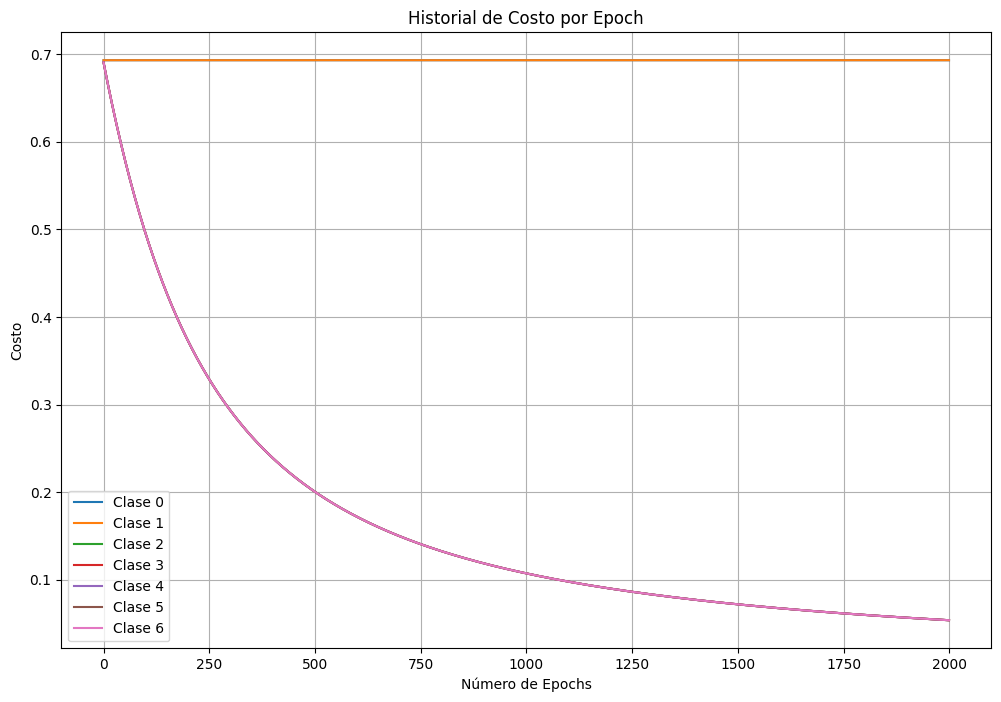

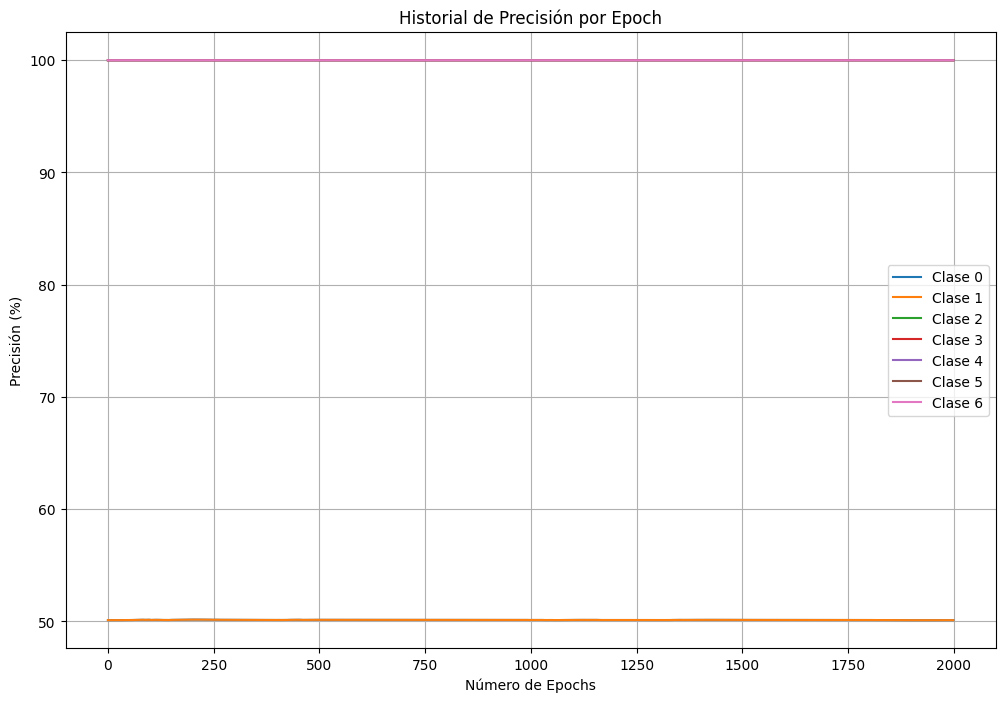

Precisión del conjunto de entrenamiento: 50.11%


In [ ]:
import matplotlib.pyplot as plt
#P5

# Parámetros
num_labels = 7  # Número de clases en el problema de clasificación
alpha = 0.01    # Tasa de aprendizaje para el descenso por gradiente
num_iters = 2000 # Número de iteraciones para el algoritmo de descenso por gradiente
lambda_ = 0.1   # Parámetro de regularización para prevenir el sobreajuste

#P8
# Suponiendo que X y y ya están definidos
all_theta, cost_histories, accuracy_histories = oneVsAll(X, y, num_labels, alpha, num_iters, lambda_)
#P5
# Graficar el costo
#p7
plt.figure(figsize=(12, 8))  # Configura el tamaño de la figura para la gráfica
for i in range(num_labels):
    plt.plot(range(num_iters), cost_histories[i], label=f'Clase {i}')  # Traza el historial de costo para cada clase
plt.xlabel('Número de Epochs')  # Etiqueta del eje x
plt.ylabel('Costo')  # Etiqueta del eje y
plt.title('Historial de Costo por Epoch')  # Título de la gráfica
plt.legend()  # Muestra la leyenda en la gráfica
plt.grid(True)  # Añade una cuadrícula a la gráfica
plt.show()  # Muestra la gráfica

# Graficar la precisión
plt.figure(figsize=(12, 8))  # Configura el tamaño de la figura para la gráfica
for i in range(num_labels):
    plt.plot(range(num_iters), accuracy_histories[i], label=f'Clase {i}')  # Traza el historial de precisión para cada clase
plt.xlabel('Número de Epochs')  # Etiqueta del eje x
plt.ylabel('Precisión (%)')  # Etiqueta del eje y
plt.title('Historial de Precisión por Epoch')  # Título de la gráfica
plt.legend()  # Muestra la leyenda en la gráfica
plt.grid(True)  # Añade una cuadrícula a la gráfica
plt.show()  # Muestra la gráfica

#P9
# Hacer predicciones y calcular precisión
pred = predictOneVsAll(all_theta, X)  # Genera predicciones para el conjunto de datos X usando los parámetros obtenidos
accuracy = np.mean(pred == y) * 100  # Calcula la precisión del modelo comparando las predicciones con las etiquetas reales
print('Precisión del conjunto de entrenamiento: {:.2f}%'.format(accuracy))  # Imprime la precisión en formato porcentaje
